# **PROBLEM STATEMENT**

In this kernel, we will try to answer the question that whether or not it will rain tomorrow in Australia. We implement Logistic Regression with Python and Scikit-Learn.

To answer the question, we build a classifier to predict whether or not it will rain tomorrow in Australia. We train a binary classification model using Logistic Regression. I have used the Rain in Australia dataset for this project.

So, let's get started.

###**Importing the neccessary libraries**



In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

###**Loading the dataset**

In [ ]:
rainfall = pd.read_csv('weatherAUS.csv')
rainfall.head(n=2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


###**Data Preperation**
> Now we are going to fclean the dataset before modelling

In [ ]:
# Dimension of the dataest
shape = rainfall.shape
print("The number of instances and variables are = {}".format(shape))

The number of instances and variables are = (10811, 23)


In [ ]:
# Columns of the dataset
rainfall.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
# Summary of the dataset
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10811 entries, 0 to 10810
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10811 non-null  object 
 1   Location       10811 non-null  object 
 2   MinTemp        10757 non-null  float64
 3   MaxTemp        10766 non-null  float64
 4   Rainfall       10676 non-null  float64
 5   Evaporation    4357 non-null   float64
 6   Sunshine       2005 non-null   float64
 7   WindGustDir    10624 non-null  object 
 8   WindGustSpeed  10624 non-null  float64
 9   WindDir9am     9786 non-null   object 
 10  WindDir3pm     10657 non-null  object 
 11  WindSpeed9am   10730 non-null  float64
 12  WindSpeed3pm   10734 non-null  float64
 13  Humidity9am    10616 non-null  float64
 14  Humidity3pm    10610 non-null  float64
 15  Pressure9am    10599 non-null  float64
 16  Pressure3pm    10595 non-null  float64
 17  Cloud9am       5655 non-null   float64
 18  Cloud3

**Observation**

* We can see that we have both categorical and numerical dtype
* Categorical dtype is **object**
* Numerical dtype is **float**
* We also observed that there are lots of missing values in this dataset

**Conclusion on this observation**

* Check the missing values in each columns and decide whether to fillna or dropna
 

In [ ]:
#Check the total missing values in each columns
null_value = rainfall.isnull().sum()
percentage_missing = rainfall.isnull().sum()/rainfall.shape[0]*100

values = {
    'null value' : null_value,
    'percentage missing' : percentage_missing,
    'dtypes' : rainfall.dtypes
}

total = pd.DataFrame(values).sort_values(by='percentage missing', ascending=False)
total.head(n=6)

,null value,percentage missing,dtypes
Sunshine,8806,81.454075,float64
Evaporation,6454,59.698455,float64
Cloud9am,5156,47.692165,float64
Cloud3pm,4954,45.823698,float64
WindDir9am,1025,9.481084,object
Pressure3pm,216,1.997965,float64


In [ ]:
isnull = rainfall.isnull().values.sum()
notnull = rainfall.notnull().values.sum()
print("The total number of missing values in the dataset is {}".format(isnull))
print("The total number of non-missing values in the dataset is {}".format(notnull))

The total number of missing values in the dataset is 28536
The total number of non-missing values in the dataset is 220117


**Observation**

Still in considering whether to use fillna() or dropna(), we have to consider:

* Target Variables
* Features Variables

#### **UNIVARIANTE ANALYSIS**

**Target Variable**

> Since we are making prediction for rainfall our target variable is **RainTomorrow**

In [ ]:
isna = rainfall['RainTomorrow'].isna().sum()
notnull = rainfall['RainTomorrow'].notnull().sum()
print("The total number of missing values in the target variables is {}".format(isna))
print("The total number of non-missing values in the target variables is {}".format(notnull))

The total number of missing values in the target variables is 136
The total number of non-missing values in the target variables is 10675


In [ ]:
rainfall['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

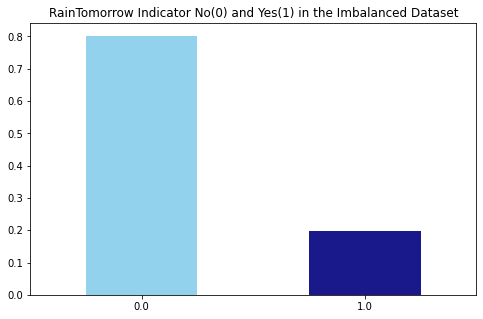

In [ ]:
fig = plt.figure(figsize = (8,5))
rainfall.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

**Conclusion on this observation**

> From the analysis above we can see that we can't proceed with this target dataset because it is **imbalanced** i.e the number of variables to be used for predictions are smaller than expected.

**What can be done ?**

> In this kind of scenerio we would have to oversample the minority in other to balance the dataset.

In [ ]:
from sklearn.utils import resample

no = rainfall[rainfall.RainTomorrow == 0]
yes = rainfall[rainfall.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no,yes_oversampled])

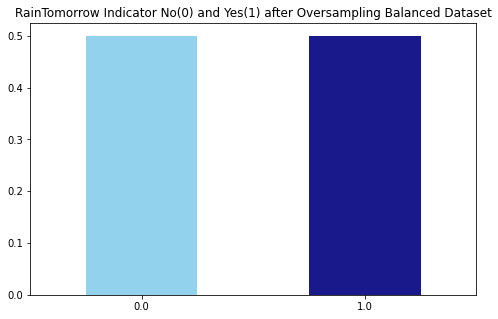

In [ ]:
fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind = 'bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling Balanced Dataset')
plt.show()

In [ ]:
new = oversampled['RainTomorrow'].isna().sum()
print("The total number of missing values in target column is {}".format(new))

The total number of missing values in target column is 0


**Observation**

>From the analysis above we can say that we have not only balanced the target variable for effective predictions but we have also filled the target variable missing data.

**What to do ?**

>We still have the feature variables to deal with (missing values).


**Feature Variables**

All except the target variable are the feature varaibles.

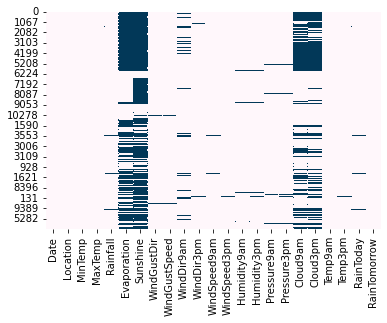

In [ ]:
# Examining the missing values with a seabor plot
import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

In [ ]:
# Examining the total percentage of missing values in tabular form
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count())
missing = pd.concat([total, percent], axis = 1,keys=['Total','Percent'])
missing.head(n=6)

,Total,Percent
Sunshine,13467,0.786900
Evaporation,10197,0.595828
Cloud9am,7380,0.431226
Cloud3pm,7072,0.413229
WindDir9am,1440,0.084142
Pressure3pm,287,0.016770


**Observations**

> We can deduce that there are more missing values in the dataset.

**What can be done ?**

> * Firstly work on the missing catergorical columns (object)
> * Then work on the missing numerical columns (float)

 #### **BIVARIATE ANALYSIS**

##### **Missing Categorical columns**

In [ ]:
# Previewing all categorical columns
cartegorical = oversampled.select_dtypes(include=['object']).columns
cartegorical

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday'],
      dtype='object')

>Labels are called Cardinality in Machine Learning Modellings.

> Lets take note of labels in categorical data's, the more the labels the harder it is to make predictions.

In [ ]:
for var in cartegorical:
  print(var, ' contains ', len(oversampled[var].unique()), ' labels')

Date  contains  3039  labels
Location  contains  4  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels


###### **Date**

**Observations**

* We can see that 'Date' has 3436 labels which could be a very big problem, let's so some preprocessing on date to reduce its cardinality

> **What to do ?**
>
> * convert date column to datatime format from object
> * then work on other catergorical columns
> * Drop the original Date column from the dataset

In [ ]:
# Convert date column to datetime format
oversampled['Date'] = pd.to_datetime(oversampled['Date'])

In [ ]:
# Extract Year, Month and Day from the Date column
oversampled['Year'] = oversampled['Date'].dt.year
oversampled['Month'] = oversampled['Date'].dt.month
oversampled['Day'] = oversampled['Date'].dt.month

In [ ]:
# Drop the date column
oversampled.drop('Date', axis=1, inplace = True)

> * Seeing that we have been able to extract the Date column to datetime, lets work on the other catergorocal data one at a time.

In [ ]:
cartegorical = oversampled.select_dtypes(include=['object']).columns
cartegorical.to_list()

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
# Check for missing values in categorical variables 
oversampled[cartegorical].isnull().sum()

Location          0
WindGustDir     156
WindDir9am     1440
WindDir3pm      220
RainToday       148
dtype: int64

###### **Location**

**Observations**

> * Location has 49 labels
> * Lets find a way to remove the labels

**What can be done ?**
> * let's do One Hot Encoding of Location variable, 
> * Get k-1 dummy variables after One Hot Encoding,
> * Preview the dataset

In [ ]:
oversampled['Location'].value_counts()

Albury           4892
BadgerysCreek    4724
Cobar            4120
CoffsHarbour     3378
Name: Location, dtype: int64

In [ ]:
pd.get_dummies(oversampled['Location'], drop_first=True).head(n=2)

,BadgerysCreek,Cobar,CoffsHarbour
0,0,0,0
1,0,0,0


###### **WindGustDir**

**Observations**

> * WindGustDir has 17 labels
> * Lets find a way to remove the labels

**What can be done ?**
> * let's do One Hot Encoding of Location variable, 
> * Get k-1 dummy variables after One Hot Encoding,
> * Add a column for nan
> * Preview the dataset

In [ ]:
oversampled['WindGustDir'].value_counts()

SW     1593
WSW    1329
W      1295
NNE    1259
S      1213
SSW    1100
NE     1086
WNW    1081
ENE    1059
E      1043
N       961
SSE     872
SE      864
ESE     844
NW      726
NNW     633
Name: WindGustDir, dtype: int64

In [ ]:
pd.get_dummies(oversampled['WindGustDir'], drop_first=True, dummy_na=True).head(n=2)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


###### **WindDir9am**

**Observations**

> * WindDir9am has 17 labels
> * Lets find a way to remove the labels

**What can be done ?**
> * let's do One Hot Encoding of Location variable, 
> * Get k-1 dummy variables after One Hot Encoding,
> * Add a column for nan
> * Preview the dataset

In [ ]:
oversampled['WindDir9am'].value_counts()

SW     2236
WSW    1226
N      1159
SE     1130
SSW     999
NNE     966
NE      921
S       918
SSE     914
E       874
ESE     851
ENE     847
NNW     740
NW      671
W       656
WNW     566
Name: WindDir9am, dtype: int64

In [ ]:
pd.get_dummies(oversampled['WindDir9am'], drop_first=True, dummy_na=True).head(n=2)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


###### **WindDir3pm**

**Observations**

> * WindDir3pm has 17 labels
> * Lets find a way to remove the labels

**What can be done ?**
> * let's do One Hot Encoding of Location variable, 
> * Get k-1 dummy variables after One Hot Encoding,
> * Add a column for nan
> * Preview the dataset

In [ ]:
oversampled['WindDir3pm'].value_counts()

NE     1354
NNE    1290
S      1247
E      1141
SSE    1106
SE     1102
WSW    1072
W      1072
ESE    1062
SSW    1050
N      1035
WNW    1026
SW     1004
ENE     924
NW      764
NNW     645
Name: WindDir3pm, dtype: int64

In [ ]:
pd.get_dummies(oversampled['WindDir3pm'], drop_first=True, dummy_na=True).head(n=2)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
pd.get_dummies(oversampled['WindDir3pm'], drop_first=True, dummy_na=True).sum(axis=0)

ENE     924
ESE    1062
N      1035
NE     1354
NNE    1290
NNW     645
NW      764
S      1247
SE     1102
SSE    1106
SSW    1050
SW     1004
W      1072
WNW    1026
WSW    1072
NaN     220
dtype: int64

###### **RainToday**

**Observations**

> * RainToday has 3 labels
> * Lets find a way to remove the labels

**What can be done ?**
> * let's do One Hot Encoding of Location variable, 
> * Get k-1 dummy variables after One Hot Encoding,
> * Add a column for nan
> * Preview the dataset

In [ ]:
oversampled['RainToday'].value_counts()

No     11960
Yes     5006
Name: RainToday, dtype: int64

In [ ]:
oversampled['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
pd.get_dummies(oversampled['RainToday'], drop_first=True, dummy_na=True).head(n=2)

,Yes,NaN
0,0,0
1,0,0


In [ ]:
pd.get_dummies(oversampled['RainToday'], drop_first=True, dummy_na=True).sum(axis=0)

Yes    5006
NaN     148
dtype: int64

##### **Missing Numerical columns**

In [ ]:
# Previewing all categorical columns
numerical = oversampled.select_dtypes(include=['float64','int64']).columns
numerical
print('There are {} numerical variables\n'.format(len(numerical)))

There are 20 numerical variables



**Observations**

> We can deduce that there are 20 numerical variables in the dataset.

**What can be done ?**

> * Exploration of numerical variables

In [ ]:
oversampled[numerical].isnull().sum()

MinTemp             42
MaxTemp             12
Rainfall           148
Evaporation      10197
Sunshine         13467
WindGustSpeed      156
WindSpeed9am        71
WindSpeed3pm        77
Humidity9am        240
Humidity3pm        249
Pressure9am        281
Pressure3pm        287
Cloud9am          7380
Cloud3pm          7072
Temp9am             44
Temp3pm             57
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

**Observations**

> * Let's check for outliers in the numerical variables, because of the suspision of so many missing data's in each columns.
>
> check the link to know more about outliers [About Outliers](https://medium.com/@michealedekin/what-is-an-outlier-9c0526b4bce5)

**What to do next ?**
> * Use statistical method to view outliers
> * Check if they are normal or skewed distribution
> * Normal distribution == Extreme value analysis
> * Skewed distribution == IQR (Interquatile Range)

In [ ]:
print(round(oversampled[numerical].describe()),2)

       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  17072.0  17102.0   16966.0       6917.0    3647.0        16958.0   
mean      12.0     23.0       4.0          5.0       6.0           37.0   
std        6.0      7.0      13.0          4.0       4.0           14.0   
min       -3.0      7.0       0.0          0.0       0.0            7.0   
25%        8.0     18.0       0.0          2.0       2.0           28.0   
50%       13.0     23.0       0.0          4.0       7.0           35.0   
75%       17.0     28.0       2.0          7.0      10.0           44.0   
max       30.0     47.0     371.0         86.0      14.0          107.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count       17043.0       17037.0      16874.0      16865.0      16833.0   
mean           12.0          16.0         73.0         55.0       1017.0   
std             8.0           8.0         20.0         23.0          7.0   
min             0.0 

**Observations**

> On closer inspection, i found out that 
>
>```
Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm
>```
> all contains outliers.

**What to do?**

> * Let's further analyse these columns with a boxplot

Text(0, 0.5, 'WindGustSpeed')

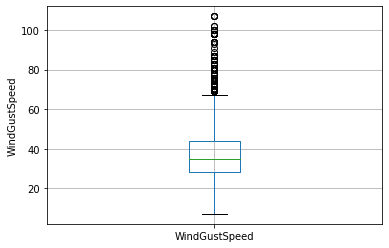

In [ ]:

fig = oversampled.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

Text(0, 0.5, 'WindSpeed3pm')

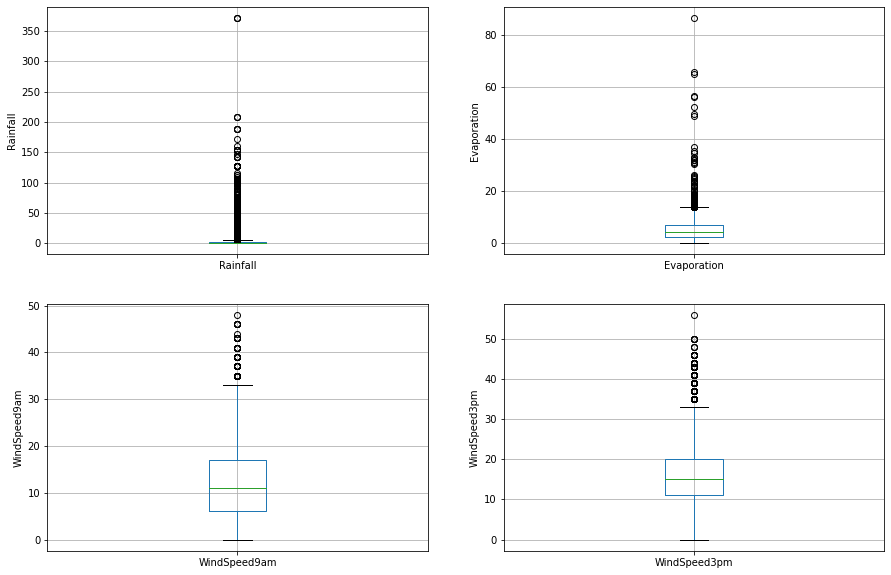

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = oversampled.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = oversampled.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = oversampled.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = oversampled.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')


>> * We can see there are outliers in the above plots
>
> * Now let's check if they are skewed or normal

In [ ]:
# plot histogram to check distribution

plt.figure(figsize=(15,10), sharey=True)


plt.subplot(2, 2, 1)
fig = oversampled.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = oversampled.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = oversampled.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = oversampled.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

TypeError: ignored

> * Now we can see that all columns are skewed i.e right sided skewed so we would use IQR

In [ ]:
# # Input categorical variable with fillna() and Mode
# oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
# oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
# oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
# oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
# oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [ ]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [ ]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [ ]:
total = MiceImputed.isnull().sum().sort_values(ascending=False)
percent = (MiceImputed.isnull().sum()/MiceImputed.isnull().count())
missing = pd.concat([total, percent], axis = 1,keys=['Total','Percent'])
missing

In [ ]:
MiceImputed.columns.duplicated()

In [ ]:
sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow') 

In [ ]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [ ]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X,y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

In [ ]:
# Feature Importance using Wrapping Method (Random Forest)
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']

selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X,y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

In [ ]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

#Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
            'max_features': 'sqrt'}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, rou_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

In [ ]:
# Light GBM
import lightgbm as lgb
params_lgb = {'colsample_bytree' : 0.95,
             'max_depth' : 16,
             'min_split_gain' : 0.1,
             'n_estimators' : 200,
             'num_leaves': 50, 
             'reg_alpha': 1.2, 
             'reg_lambda': 1.2, 
             'subsample': 0.95, 
             'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

In [ ]:
# Catboost
!pip install catboost
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)

In [ ]:
# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

In [ ]:
# Neural Network
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

In [ ]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, rou_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_nn, coh_kap_rf, coh_kap_lgb, coh_kap_cb, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_lgb, tt_cb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest','LightGBM','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)